In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17096704/17464789 [============================>.] - ETA: 0s

In [3]:
# The argument of 10,000 means you'll only keep the top 10,000 most frequently used words in the training data

In [ ]:
# Let us inspect the data vectors.

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [7]:
max([max(sequence) for sequence in train_data]) # Checking the max value of the train data

9999

In [8]:
# Quickly decode the vector numbers into their words by reverse lookup

In [9]:
word_index = imdb.get_word_index()

1433600/1641221 [=========================>....] - ETA: 0s

In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [11]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [12]:
# Very cool!!!!

In [13]:
# Let's proceed to prepare the data

In [14]:
import numpy as np

In [17]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros([len(sequences), dimension])
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [18]:
x_train = vectorize_sequences(train_data)

In [19]:
x_test = vectorize_sequences(test_data)

In [20]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [21]:
# You should also vectorize your labels

In [22]:
train_labels[0]

1

In [23]:
y_train = np.asarray(train_labels).astype('float32')

In [24]:
y_train[0]

1.0

In [25]:
y_test = np.asarray(test_labels).astype('float32')

In [26]:
# Now the data is ready to be fed into the neural network

In [27]:
# Lets proceed to the model building phase

In [28]:
from keras import models
from keras import layers

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
# Once you define the network topology of the model, you can proceed to compile step, where you define the optimizer
# and the loss function and also the metrics to measure, while training

In [31]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [32]:
# Set a sample out for validation from your training data

In [34]:
x_train.shape

(25000, 10000)

In [35]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [37]:
partial_x_train.shape

(15000, 10000)

In [38]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [39]:
# Now you will train the model for 20 epochs and a mini-batch of 512

In [52]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['acc'])

history = model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s - loss: 0.0080 - acc: 0.9987 - val_loss: 0.7187 - val_acc: 0.8662
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.0030 - acc: 0.9999 - val_loss: 0.7651 - val_acc: 0.8591
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.0032 - acc: 0.9995 - val_loss: 0.7802 - val_acc: 0.8658
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.8101 - val_acc: 0.8664
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.0035 - acc: 0.9991 - val_loss: 0.8376 - val_acc: 0.8623
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 6.5368e-04 - acc: 1.0000 - val_loss: 0.8513 - val_acc: 0.8627
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 5.2783e-04 - acc: 1.0000 - val_loss: 0.8799 - val_acc: 0.8622
Epoch 8/20
15000/15000 [=============================

In [41]:
# Now lets plot the training and validation loss

In [53]:
import matplotlib.pyplot as plt

In [54]:
history_dict = history.history

In [55]:
loss_values = history_dict['loss']

In [56]:
val_loss_values = history_dict['val_loss']

In [59]:
acc = history_dict['acc']

In [60]:
epochs = range(1, len(acc) + 1)

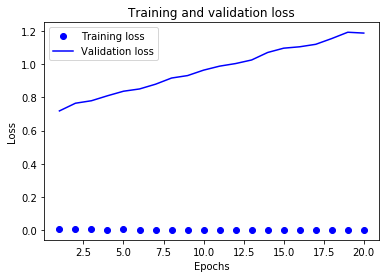

In [61]:
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
plt.clf()

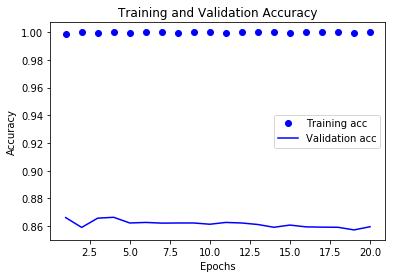

In [63]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Let's re-train the model from scratch with lower epochs of 4

In [64]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s - loss: 0.4744 - acc: 0.8230     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2749 - acc: 0.9074     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.2074 - acc: 0.9265     
Epoch 4/4
24288/25000 [============================>.] - ETA: 0s

In [65]:
results

[0.28848358572006227, 0.88627999999999996]

In [66]:
# This fairly naive approach achieves an accuracy of 88% on the test data set. With the state of the art network 
# topolies, you should be able to get that number upto to 95%

In [67]:
# Using the trained network to generate the predition on the new data

In [68]:
model.predict(x_test)

array([[ 0.93162775],
       [ 0.96277106],
       [ 0.99958414],
       ..., 
       [ 0.68848532],
       [ 0.00535782],
       [ 0.81720948]], dtype=float32)

In [ ]:
# This concludes the binary classification problem to identifying the sentiment based on the movie reviews.